In [93]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

import os
import numpy as np
import pandas as pd
import scipy.signal
import pyabf

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import ipywidgets as widgets
import IPython.display

import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

from colinAnalysis import colinAnalysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load a folder of abf files

In [446]:
path = '/media/cudmore/data/colin'
#path = '/Users/cudmore/data/colin'
ca = colinAnalysis(path)  # load all abf in folder

### Analyze all files in folder (slow because of smoothing)

In [456]:
# read from xls
path = '/media/cudmore/data/colin/cell_db.xls'
dfLoaded = pd.read_excel(path, index_col=None, skiprows=1, engine='xlrd')
display(dfLoaded)

,Unnamed: 0,File,animal number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
0,NaN,21n10003,NaN,m,wt,NaN,83.00,1.312,49.0000,NaN,NaN
1,NaN,21n10007,NaN,m,wt,NaN,83.00,1.312,81.2870,NaN,NaN
2,NaN,21n10008,NaN,m,wt,NaN,83.00,0.000,83.0000,NaN,NaN
3,NaN,21n19004-ko,NaN,f,ko,NaN,112.28,0.000,50.0000,NaN,NaN
4,NaN,21n19006-ko,NaN,f,ko,NaN,195.53,0.000,55.0000,NaN,NaN
5,NaN,21n22000,NaN,m,wt,NaN,93.08,0.000,93.0815,-40.0,NaN
6,NaN,21n23004-ko,NaN,f,ko,NaN,64.67,0.000,64.6600,-40.0,NaN


In [460]:
# load and analyze all files (slow)

for fileNum in range(ca.numFiles):
    ca.setAnalysisIdx(fileNum)  # work on one file
    currentFile = ca.currentFile
    currentFile = os.path.splitext(currentFile)[0]
    #print(currentFile)
    detectionDict = ca.getDefaultDetection()
    
    dfRow = dfLoaded[ dfLoaded['File']==currentFile ]
    display(dfRow)
    
    detectionDict['xRange'] = [dfRow['start (sec)'].values[0], dfRow['stop (sec)'].values[0]] 
    detectionDict['genotype'] = dfRow['genotype'].values[0]
    detectionDict['sex'] = dfRow['sex'].values[0]
    
    detectionDict['height'] = dfRow['threshold (pA)'].values[0]  # User specified, CRITICAL
            
    ca.detect(detectionDict)

,Unnamed: 0,File,animal number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
0,NaN,21n10003,NaN,m,wt,NaN,83.0,1.312,49.0,NaN,NaN


   21n10003.abf Num Sweeps: 1 Recording Dur: 83.0 Peaks within xRange: [1.312, 49.0] to 6 peaks


,Unnamed: 0,File,animal number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
1,NaN,21n10007,NaN,m,wt,NaN,83.0,1.312,81.287,NaN,NaN


   21n10007.abf Num Sweeps: 1 Recording Dur: 83.0 Peaks within xRange: [1.312, 81.287] to 22 peaks


,Unnamed: 0,File,animal number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
2,NaN,21n10008,NaN,m,wt,NaN,83.0,0.0,83.0,NaN,NaN


   21n10008.abf Num Sweeps: 1 Recording Dur: 83.0 Peaks within xRange: [0.0, 83.0] to 18 peaks


,Unnamed: 0,File,animal number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
3,NaN,21n19004-ko,NaN,f,ko,NaN,112.28,0.0,50.0,NaN,NaN


   21n19004-ko.abf Num Sweeps: 1 Recording Dur: 112.28 Peaks within xRange: [0.0, 50.0] to 7 peaks


,Unnamed: 0,File,animal number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
4,NaN,21n19006-ko,NaN,f,ko,NaN,195.53,0.0,55.0,NaN,NaN


   21n19006-ko.abf Num Sweeps: 1 Recording Dur: 195.53 Peaks within xRange: [0.0, 55.0] to 43 peaks


,Unnamed: 0,File,animal number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
5,NaN,21n22000,NaN,m,wt,NaN,93.08,0.0,93.0815,-40.0,NaN


   21n22000.abf Num Sweeps: 1 Recording Dur: 93.08 Peaks within xRange: [0.0, 93.0815] to 358 peaks


,Unnamed: 0,File,animal number,sex,genotype,age (pnd),recording dur (sec),start (sec),stop (sec),V_cmd,threshold (pA)
6,NaN,21n23004-ko,NaN,f,ko,NaN,64.67,0.0,64.66,-40.0,NaN


   21n23004-ko.abf Num Sweeps: 1 Recording Dur: 64.67 Peaks within xRange: [0.0, 64.66] to 41 peaks


<IPython.core.display.Javascript object>


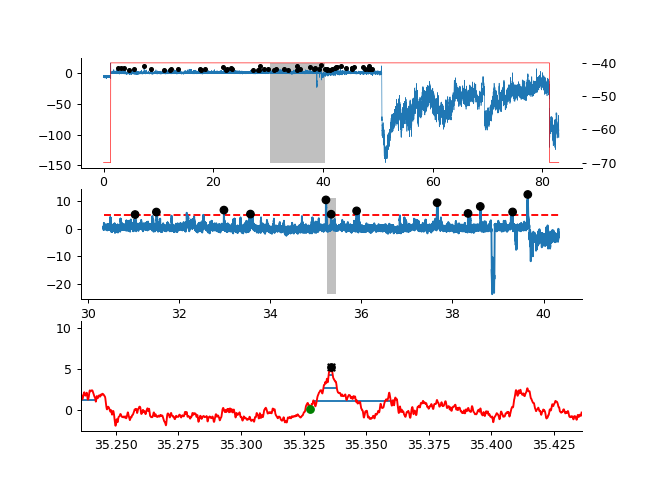

In [471]:
from colinDataBrowser import colinDataBrowser
cdb = colinDataBrowser(ca)

<IPython.core.display.Javascript object>


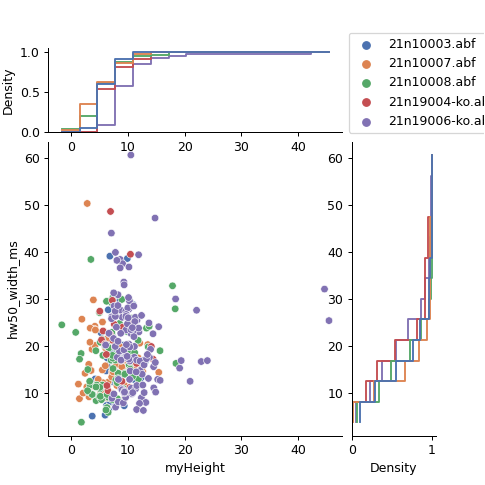

ValueError: `element` must be 'bars' when `discrete` is True

In [473]:
from myScatterWidget import myScatterWidget

# from saved file
#path = '/media/cudmore/data/colin/21n10003_full.csv'
#df = pd.read_csv(path)
#statList = df.columns

# one file
#df = ca.getDataFrame()
#statList = df.columns

# across all files
df = ca.getAllDataFrame()
statList = ca.getStatList()

msw = myScatterWidget(df, statList=statList, hueCols=['genotype', 'sex', 'file', 'myFileIdx', 'DAC0'])


### Preliminary conclusions

1. WT Frequency and Amplitude is higher than KO
2. Kitetics such as Rise Time and Half-Width do not vary between WT and knockout

<IPython.core.display.Javascript object>


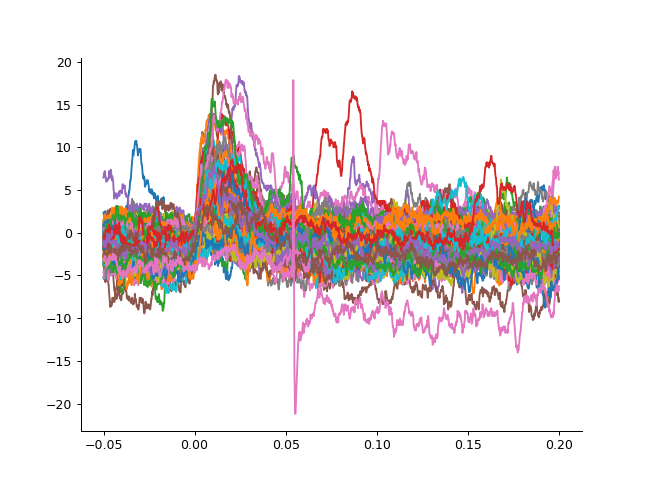

In [399]:
# plot spike clips
ca.plotClips()

<IPython.core.display.Javascript object>


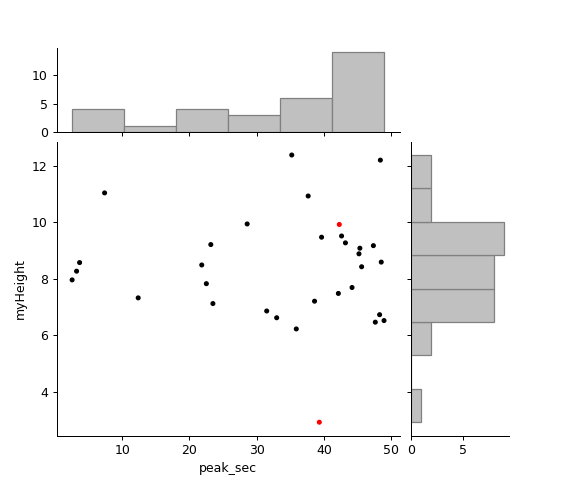

Output()

In [89]:
ca.scatterWidget(marginalHist=True)
xStat = 'peak_sec'
yStat = 'myHeight'
ca.replotScatter(xStat, yStat, stripBad=False, marginalHist=True)

<IPython.core.display.Javascript object>


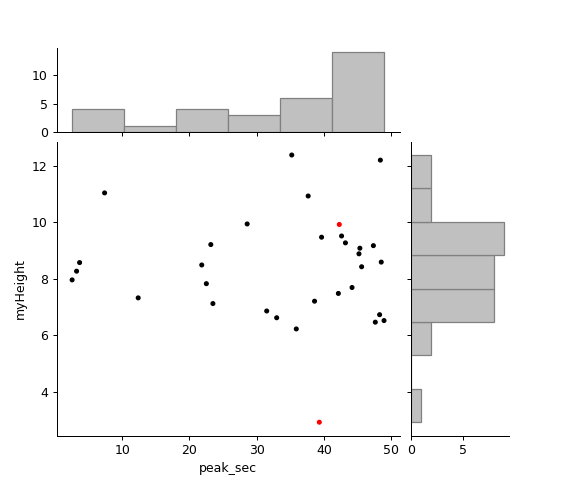

Output()

In [88]:
ca.scatterWidget(marginalHist=True)
xStat = 'peak_sec'
yStat = 'ipi_ms'
ca.replotScatter(xStat, yStat, stripBad=False, marginalHist=True)

In [87]:
dfAgg = ca.getStats(stripBad=True)
print(dfAgg)

             ipi_ms  instFreq_hz   myHeight  hw50_width_ms  riseTime_ms
count     29.000000    29.000000  30.000000      30.000000    30.000000
min      110.700000     0.105797   6.216843       6.400000     3.600000
max     9452.100000     9.033424  12.377496      29.800000    16.300000
median   674.000000     1.483680   8.450950      14.300000     7.950000
mean    1570.117241     2.114886   8.509955      16.006667     8.290000
std     2044.386746     2.318129   1.633140       6.285612     3.322582
sem      379.633088     0.430466   0.298169       1.147591     0.606618


<IPython.core.display.Javascript object>


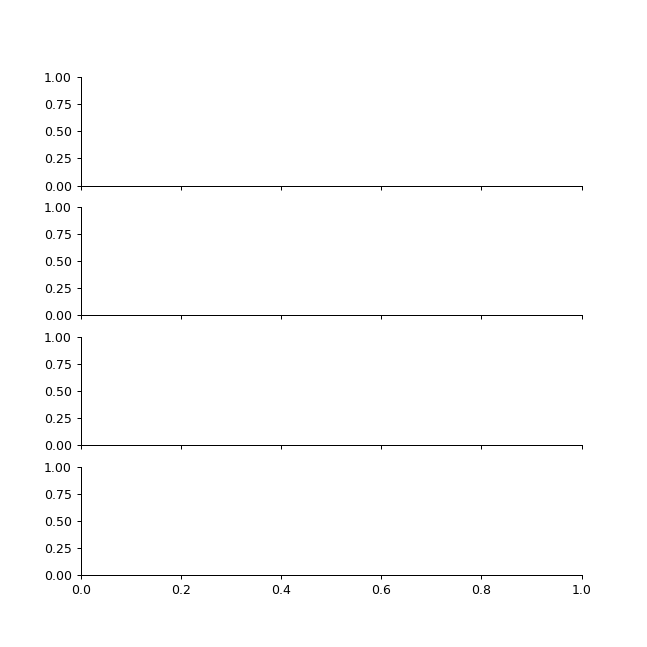

IndexError: list index out of range

In [85]:
# plot (peak height, half width) as a function of time

analysis = ca.getAnalysis()
peaks = analysis['peaks']
halfWidth = analysis['halfWidth']
fullWidth = analysis['fullWidth']

df = ca.getDataFrame()
acceptList = df['accept']
#acceptList = analysis['accept']  # TODO: update with just df

xPeakSec = ca._pnt2Sec(peaks)

numSubplot = 4
fig, axs = plt.subplots(numSubplot, 1, sharex=True, figsize=(8, 8))

myColors = ['k' if x else 'r' for x in acceptList]

showAll = True
if showAll:
    showMask = [True] * len(peaks)
else:
    showMask = acceptList
    
# strip based on showAll
xPeakSec = xPeakSec[showMask]
myColors = [myColors[idx] for idx,x in enumerate(showMask) if x]

# inter-peak-interval (sec)
peakDiffPnt = np.diff(peaks)
peakDiffMs = ca._pnt2Sec(peakDiffPnt) * 1000
myColorsFreq = myColors[1:]

axs[0].scatter(xPeakSec[1:], peakDiffMs, marker='.', c=myColorsFreq)
axs[0].set_ylabel('Inter-Peak-Interval (ms)')

# frequency
# inter-peak-interval (sec)
peakDiffPnt = np.diff(peaks)
peakFreq = 1 / ca._pnt2Sec(peakDiffPnt)
myColorsFreq = myColors[1:]

axs[1].scatter(xPeakSec[1:], peakFreq, marker='.', c=myColorsFreq)
axs[1].set_ylabel('Inst Freq (Hz)')

# height
yHeight = ca.sweepY[peaks] - fullWidth[1]
yHeight = yHeight[showMask]

axs[2].scatter(xPeakSec, yHeight, marker='.', c=myColors)
axs[2].set_ylabel('Height (y-units)')

#
halfWidth = halfWidth[0].copy()
halfWidth = halfWidth[showMask]

axs[3].scatter(xPeakSec, halfWidth, marker='.', c=myColors)
axs[3].set_xlabel('Time (s)')
axs[3].set_ylabel('Half Width (sec)')



In [180]:
# todo: package all results in Dataframe and generate stats (mean, sd, se, min, max, n)
